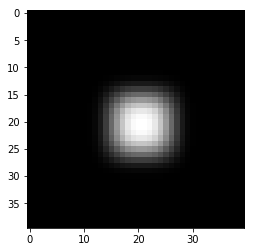

In [104]:
import skimage
%matplotlib inline
from skimage import io
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_square():
  sq = np.zeros((40,40))
  sq[15:25,15:25] = 1
  return sq

def generate_gaussian_mask(shape, sigma, sigma_y=None):
        if sigma_y==None:
            sigma_y=sigma
        rows, cols = shape

        def get_gaussian_fct(size, sigma):
            fct_gaus_x = np.linspace(0,size,size)
            fct_gaus_x = fct_gaus_x-size/2
            fct_gaus_x = fct_gaus_x**2
            fct_gaus_x = fct_gaus_x/(2*sigma**2)
            fct_gaus_x = np.exp(-fct_gaus_x)
            return fct_gaus_x

        mask = np.outer(get_gaussian_fct(rows,sigma), get_gaussian_fct(cols,sigma_y))
        return mask
    
gaus_mask = generate_gaussian_mask(generate_square().shape, 5)    


a = generate_square()
#a = z.convert('L')     

b = np.asarray(a)

c = np.fft.fft2(b)
d = np.fft.fftshift(c)
    
M = d.shape[0]
N = d.shape[1]
    
H = np.zeros((M,N))
center1 = M/2
center2 = N/2
    
d0 = 26
    
for i in range(1,M):
    for j in range(1,N):
        r = math.sqrt((i-center1)**2 + (j-center2)**2)       
        if r > d0:
            H[i,j] = 1
                
x = np.fft.fft2(H)             
H = np.fft.fftshift(x)
con = d * H * gaus_mask
e = np.abs(np.fft.fft2(con))

plt.imshow(e, 'gray')